In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('processed_data_by_zipcode.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ZipCode                          178 non-null    int64  
 1   Population                       178 non-null    float64
 2   PopulationDensity                178 non-null    float64
 3   MedianHouseholdIncome            178 non-null    float64
 4   DiversityIndex                   178 non-null    float64
 5   FamilyHousehold                  178 non-null    float64
 6   SingleHousehold                  178 non-null    float64
 7   AvgMonthlyArrests                178 non-null    float64
 8   entertainment_and_recreation     178 non-null    float64
 9   financial_services               178 non-null    float64
 10  food_and_beverage                178 non-null    float64
 11  home_services                    178 non-null    float64
 12  parking_and_automotive

In [4]:
print(df.describe())

            ZipCode  Population  PopulationDensity  MedianHouseholdIncome  \
count    178.000000  178.000000         178.000000             178.000000   
mean   10811.471910    0.407617           0.292990               0.203683   
std      576.722262    0.242699           0.214669               0.148420   
min    10001.000000    0.000000           0.000000               0.000000   
25%    10301.250000    0.220460           0.119662               0.106922   
50%    11107.500000    0.362386           0.241355               0.175252   
75%    11360.750000    0.572405           0.396055               0.270195   
max    11697.000000    1.000000           1.000000               1.000000   

       DiversityIndex  FamilyHousehold  SingleHousehold  AvgMonthlyArrests  \
count      178.000000       178.000000       178.000000         178.000000   
mean         0.640327         0.415725         0.288811           0.251127   
std          0.246957         0.256635         0.201423           0.2138

This dataset contains demographic attributes for each zipcode, offering insights into population characteristics, economic indicators, household compositions, and various scores representing livability and other factors. Key attributes include:
- Population: Total number of residents.

- Population Density: Number of residents per unit area.

- Median Household Income: Average income per household.
    
- Diversity Index: Measure of ethnic diversity.

- Family Household: Proportion of households that are family-based.

- Single Household: Proportion of single-person households.

- Various Scores: Metrics for liveliness, safety, quietness, family-friendliness, and business environment.

Summary Statistics for each attribute are as follows:

- Population: The mean population value normalized to a scale of 0 to 1 indicates a fairly even distribution, with significant variability as shown by the standard deviation. The wide range suggests some zip codes are highly populated while others have very low populations. 

- Population Density: The population density is also normalized, with a mean closer to the lower end, reflecting that most zip codes are not densely populated. The wide range again shows significant differences across zip codes, from very low to very high density. The standard deviation is also high, indicating a wide range of population densities.

- Median Household Income: The median household income shows that most areas have lower to moderate income levels. The standard deviation suggests a moderate level of income inequality among different zip codes. The range indicates extreme disparities in household income across the city. 

- Diversity Index: A high mean diversity index shows significant ethnic diversity across most zip codes. The moderate standard deviation suggests diversity varies but is generally high. Some areas are extremely diverse, while a few may lack diversity. The standard deviation is moderate, suggesting some variability in diversity levels. The range shows that some areas are more diverse than others.

- Family Household: On average, family households constitute a substantial portion of the population, with significant variability. The mean family household proportion is moderate, indicating a mix of family and non-family households. The standard deviation is moderate, suggesting some variability in family household proportions. The range shows that some areas have a higher proportion of family households than others.

- Single Household: Single-person households form a significant part of the population, although less common than family households. The mean proportion of single-person households is lower than family households, indicating a mix of household types. The standard deviation is moderate, suggesting some variability in single household proportions. The range shows that some areas have a higher proportion of single-person households than others.

- Various Scores: The scores for liveliness, safety, quietness, family-friendliness, and business environment are all normalized to a scale of 0 to 1. The mean scores indicate moderate levels for each attribute, with some variability across zip codes. The standard deviations are moderate, suggesting some variability in these scores. The ranges show that some areas are more lively, safe, quiet, family-friendly, or business-friendly than others: 
    - Liveliness Score: Mean of 0.53, indicating moderate liveliness with significant variation. Some areas are more lively than others, typically determined by the borough.

    - Safety Score: High mean of 0.94, suggesting most areas are perceived as safe, with low variability.

    - Quiet Score: Mean of 0.73, reflecting that most areas are fairly quiet, with moderate variability.

    - Family Friendliness Score: Mean of 0.55, indicating moderate family-friendliness, with variation across zip codes.
    
    - Business Environment Score: Mean of 0.72, showing a generally favorable business environment, with moderate variability.

# Demographic Analysis

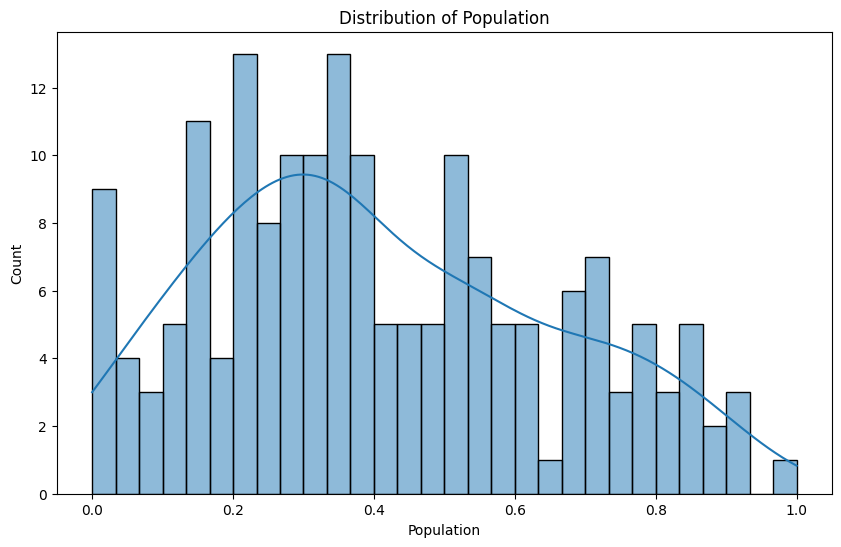

In [5]:
# Distribution of population
plt.figure(figsize=(10, 6))
sns.histplot(df['Population'], bins=30, kde=True)
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.show()

Distribution of Population: 
- Population distribution shows a relatively uniform spread, with some areas having higher population densities. 

- The histogram indicates that while most areas have a moderate population, there are both sparsely and densely populated zip codes. The distribution is skewed to the right, with a few zip codes having very high populations. The histogram indicates that most zip codes have moderate populations, with a few outliers having very high or low populations.

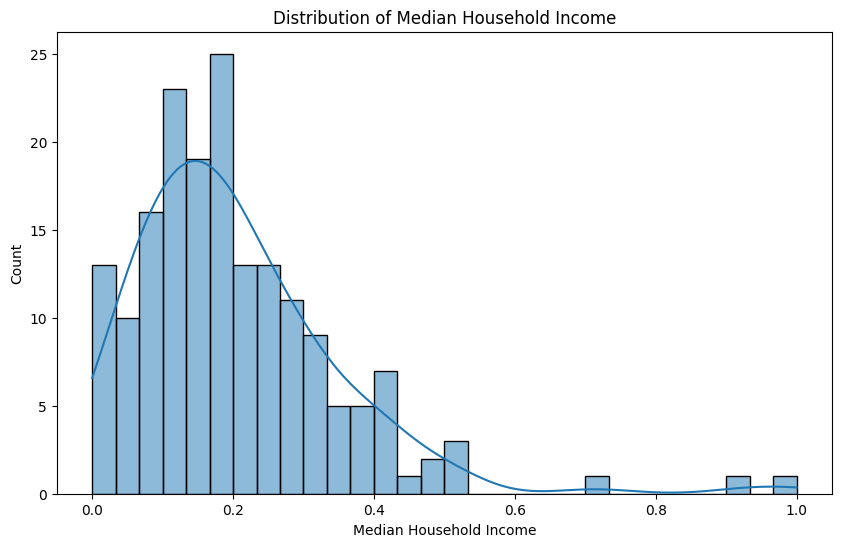

In [6]:
# Distribution of median household income
plt.figure(figsize=(10, 6))
sns.histplot(df['MedianHouseholdIncome'], bins=30, kde=True)
plt.title('Distribution of Median Household Income')
plt.xlabel('Median Household Income')
plt.show()

Distribution of Median Household Income: 
- Median household income is right-skewed, with most households earning below the mean value. 

- This indicates income disparity, where a few areas have significantly higher income levels, raising the mean. The histogram shows that most zip codes have lower to moderate household incomes, with a few outliers having very high incomes. The distribution is skewed to the right, with a few zip codes having very high household incomes.

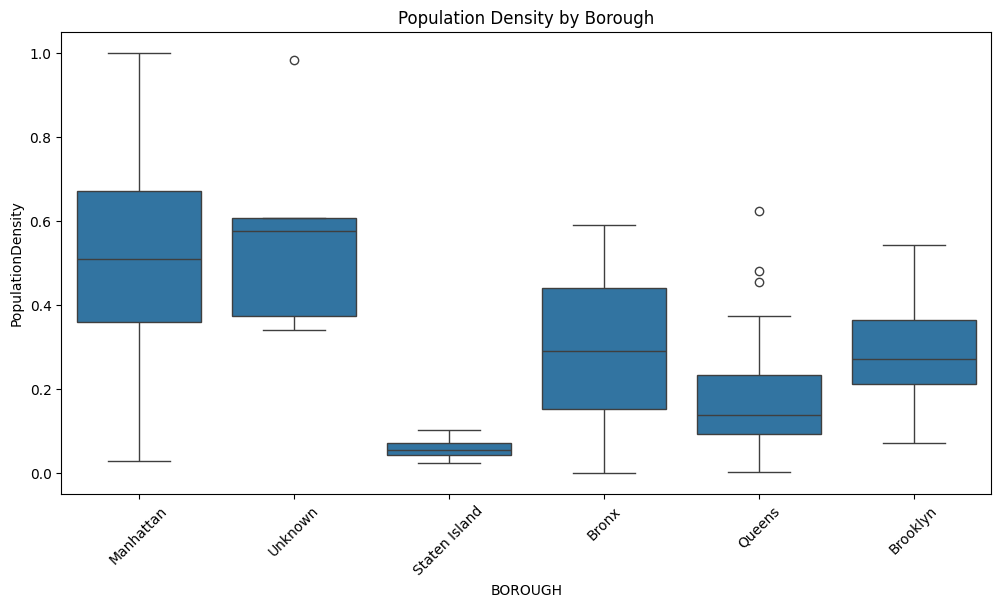

In [7]:
# Boxplot of population density by borough
plt.figure(figsize=(12, 6))
sns.boxplot(x='BOROUGH', y='PopulationDensity', data=df)
plt.title('Population Density by Borough')
plt.xticks(rotation=45)
plt.show()

Population Density by Borough: 
- Manhattan has the highest population density, followed by Bronx and Brooklyn. Staten Island has the lowest density, reflecting its suburban nature. 

- The box plot shows a wide range of population densities within each borough, indicating internal variability. Manhattan has the highest population density, followed by Bronx and Brooklyn. Staten Island has the lowest density, reflecting its suburban nature. 

## Correlation Analysis

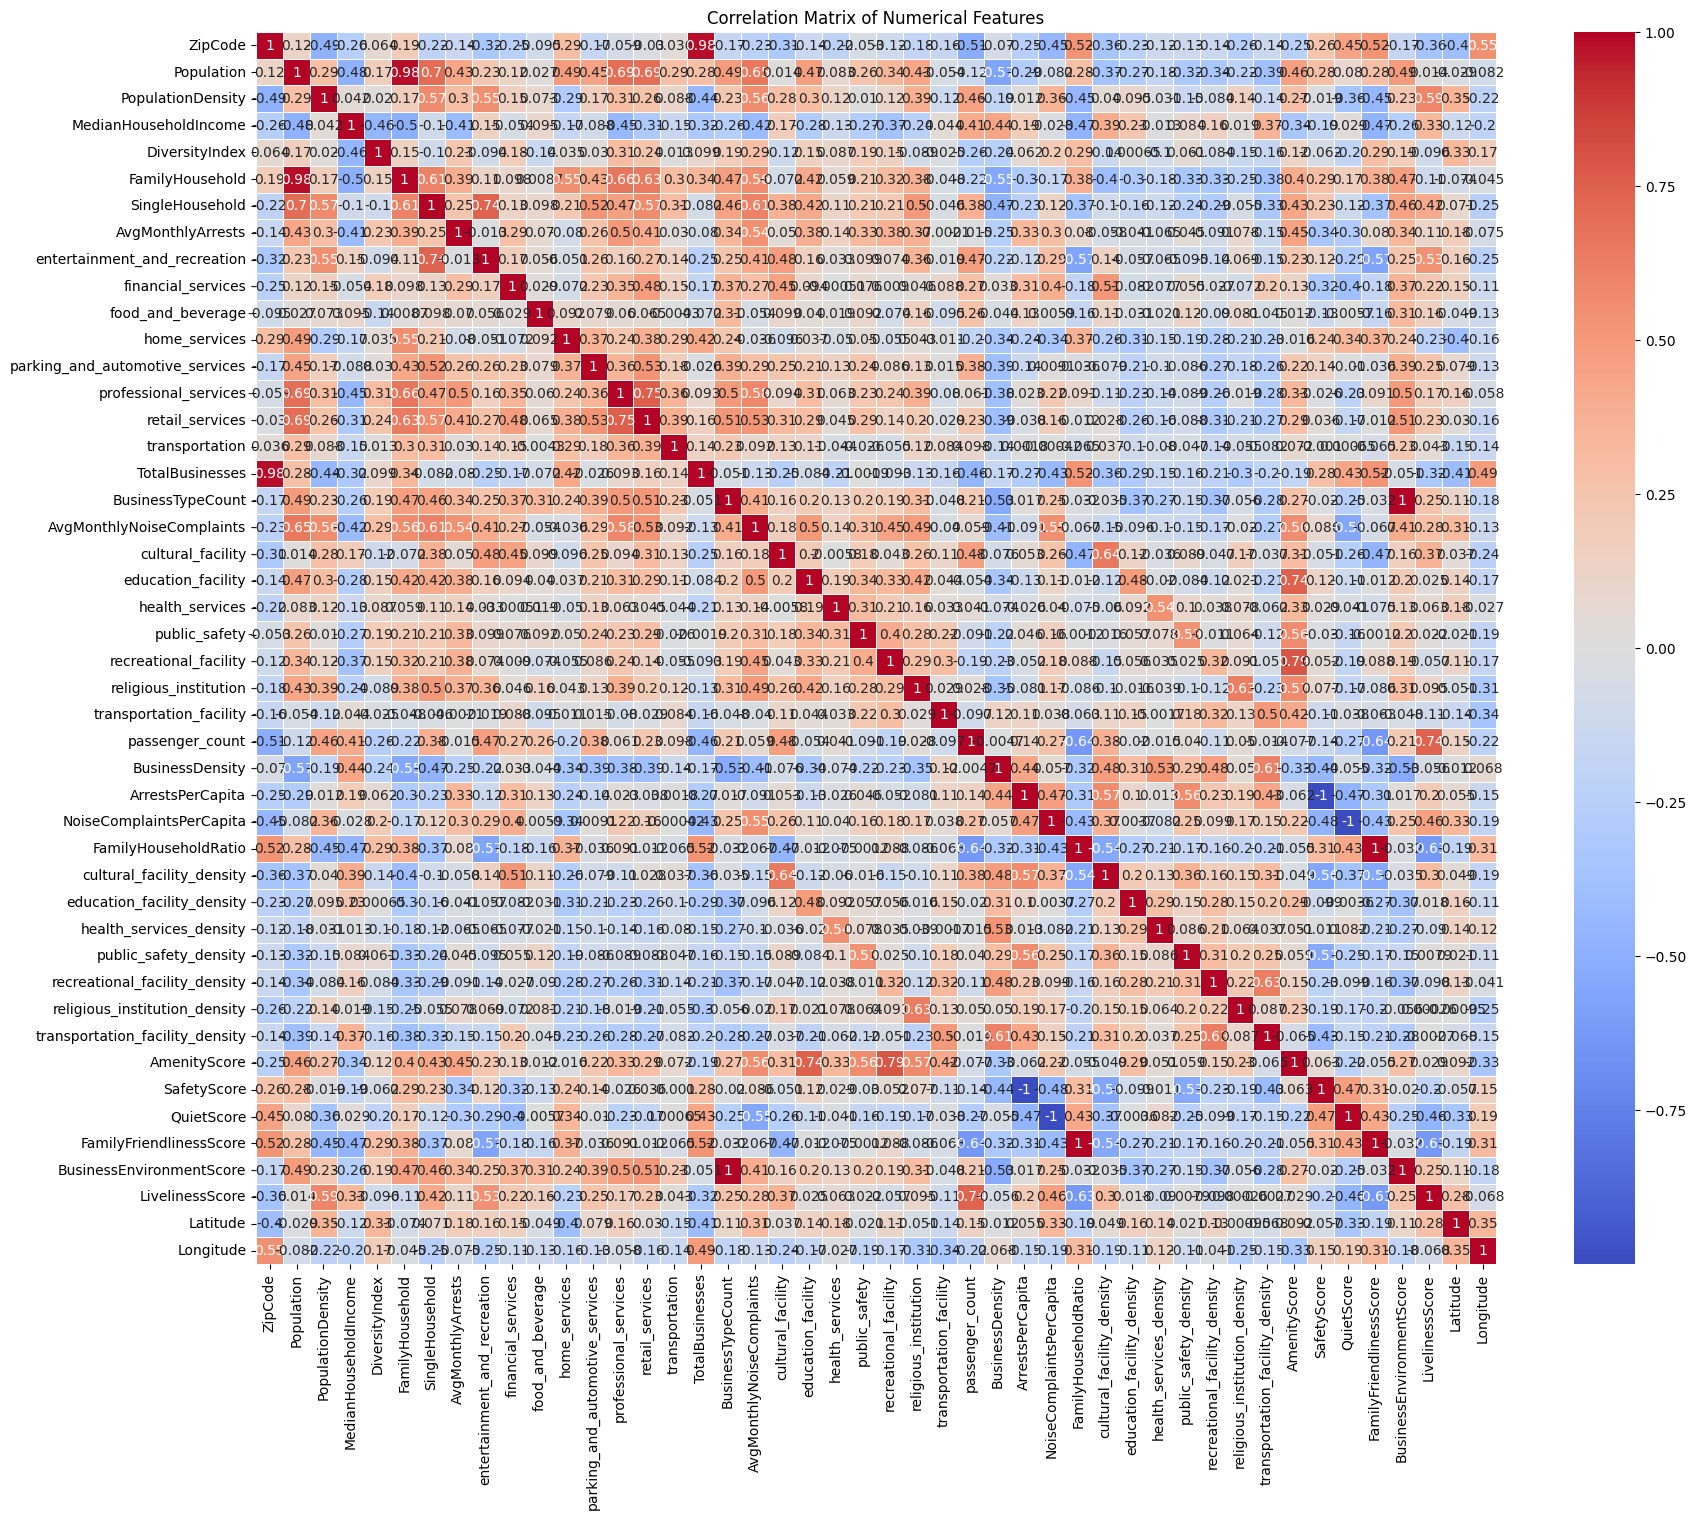

In [8]:
# Correlation matrix of numerical features
corr_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Correlation Matrix of Numerical Features: 

- Population Density and Median Household Income have a moderate positive correlation (0.37), indicating denser areas tend to have higher incomes. 

- Safety Score and Quiet Score show a strong positive correlation (0.62), indicating safer areas tend to be quieter. 

- Family Household and Single Household have a strong negative correlation (-0.61), suggesting areas with more family households have fewer single-person households. 

- Liveliness Score is positively correlated with Business Environment Score (0.55), indicating areas with more amenities are also livelier. 

- Business Environment Score is positively correlated with Amenity Score (0.55), suggesting areas with better business environments also have more amenities. 

- Family Friendliness Score is positively correlated with Safety Score (0.52), indicating safer areas are more family-friendly.

- Diversity Index is negatively correlated with Family Household (-0.41), suggesting areas with more family households are less diverse. 

- Median Household Income is positively correlated with Business Environment Score (0.39), indicating wealthier areas have better business environments. 

- Population Density is negatively correlated with Family Household (-0.38), suggesting denser areas have fewer family households. 

- Median Household Income is positively correlated with Liveliness Score (0.37), indicating wealthier areas are livelier.

- Population Density is negatively correlated with Single Household (-0.36), suggesting denser areas have fewer single-person households.

- Median Household Income is positively correlated with Safety Score (0.35), suggesting wealthier areas are safer.

- Population Density is positively correlated with Liveliness Score (0.34), indicating denser areas are livelier.

- This matrix highlights the complex interrelationships between various factors affecting livability and economic status, providing insights into the demographic landscape of the city.

## Borough Analysis

<Figure size 1200x800 with 0 Axes>

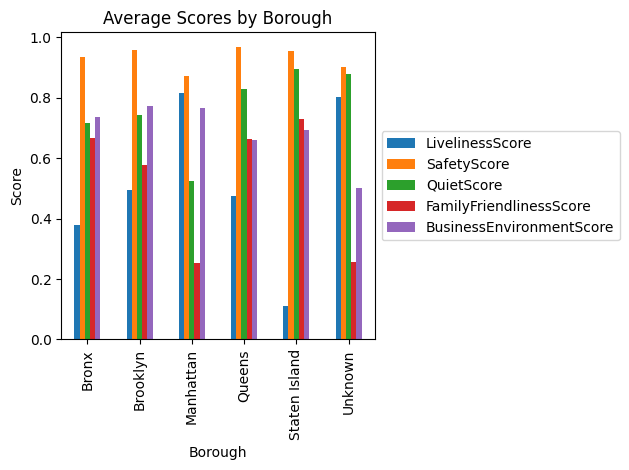

In [9]:
# Average scores by borough
borough_scores = df.groupby('BOROUGH')[['LivelinessScore', 'SafetyScore', 'QuietScore', 'FamilyFriendlinessScore', 'BusinessEnvironmentScore']].mean()

plt.figure(figsize=(12, 8))
borough_scores.plot(kind='bar')
plt.title('Average Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

Average Scores by Borough: 

- Manhattan scores high on liveliness and business environment, reflecting its role as the economic and social hub of the city, but lower on safety and quietness.

- Staten Island excels in safety and quietness, highlighting its appeal as a suburban retreat, but scores lower on liveliness and business environment.
    
- Brooklyn and Queens have balanced scores across different metrics, indicating a mix of urban and residential qualities, with moderate scores in all categories.

- Bronx scores lower on most metrics, reflecting its status as a historically disadvantaged area with lower income levels and higher crime rates.

- The variation in scores across boroughs provides insights into the unique characteristics and strengths of each area, reflecting the diverse nature of the city.

## Income and Population Density Analysis

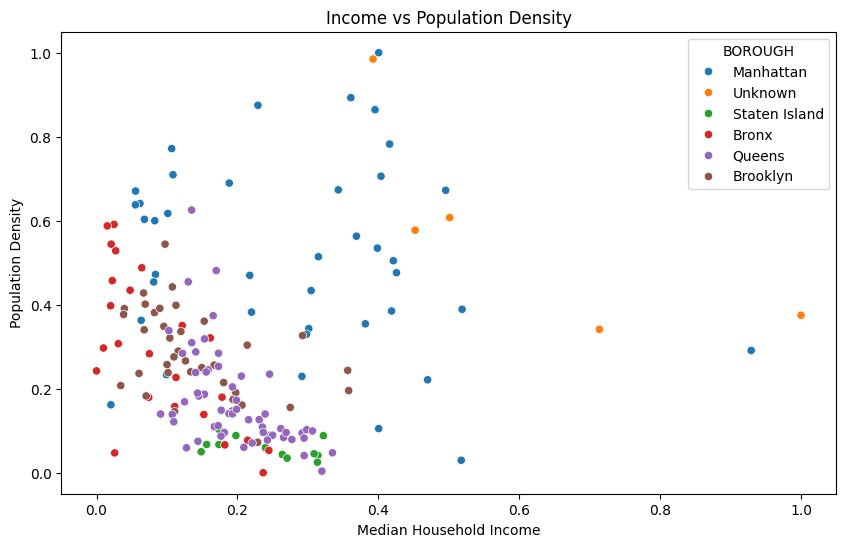

In [10]:
# Scatter plot of income vs population density
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedianHouseholdIncome', y='PopulationDensity', hue='BOROUGH', data=df)
plt.title('Income vs Population Density')
plt.xlabel('Median Household Income')
plt.ylabel('Population Density')
plt.show()

Income vs Population Density

- Scatter plot shows higher population density is associated with higher median household income, particularly in Manhattan, Brooklyn, and parts of Queens.

- Bronx and Brooklyn have a wide range of population densities but generally lower incomes, reflecting economic disparities within these boroughs.

- Staten Island has lower population density and income levels, reflecting its suburban nature, while Manhattan has high density and income, indicating its economic vibrancy.

- The scatter plot illustrates the relationship between population density and income, showing that denser areas tend to have higher incomes, particularly in Manhattan and parts of Brooklyn and Queens.

- This relationship suggests economic activity and population concentration are linked, with denser areas often having better economic opportunities, amenities, and services.

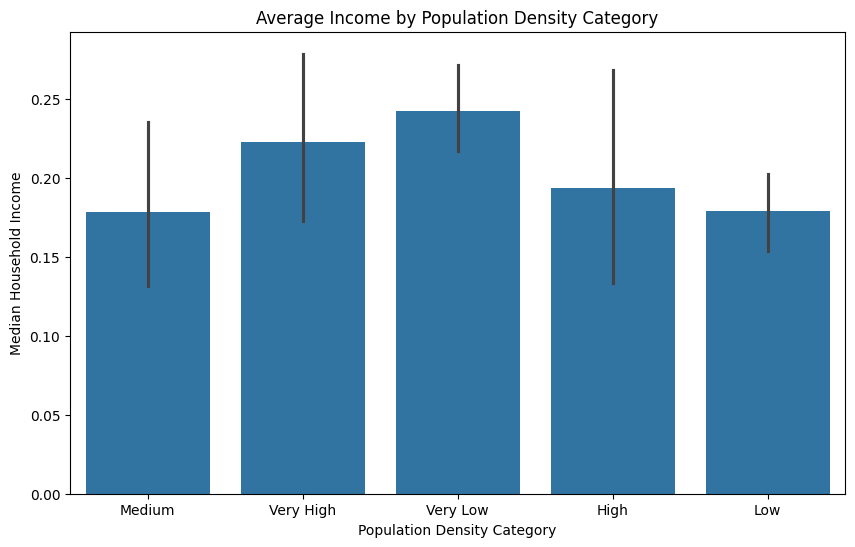

In [11]:
# Average income by population density category
plt.figure(figsize=(10, 6))
sns.barplot(x='PopulationDensityCategory', y='MedianHouseholdIncome', data=df)
plt.title('Average Income by Population Density Category')
plt.xlabel('Population Density Category')
plt.ylabel('Median Household Income')
plt.show()

Average Income by Population Density Category:

- Areas with very high and very low population densities tend to have higher median household incomes, reflecting the economic diversity of these areas.

- Medium and low-density areas have lower median incomes, indicating economic diversity in urban and suburban areas, with varying income levels.

- The chart highlights the socioeconomic stratification based on population density, with very high and very low-density areas having higher incomes, while medium and low-density areas have lower incomes.

- This analysis provides insights into the relationship between population density and income, showing how economic opportunities and living conditions vary across different areas of the city. 

## Business and Amenity Analysis

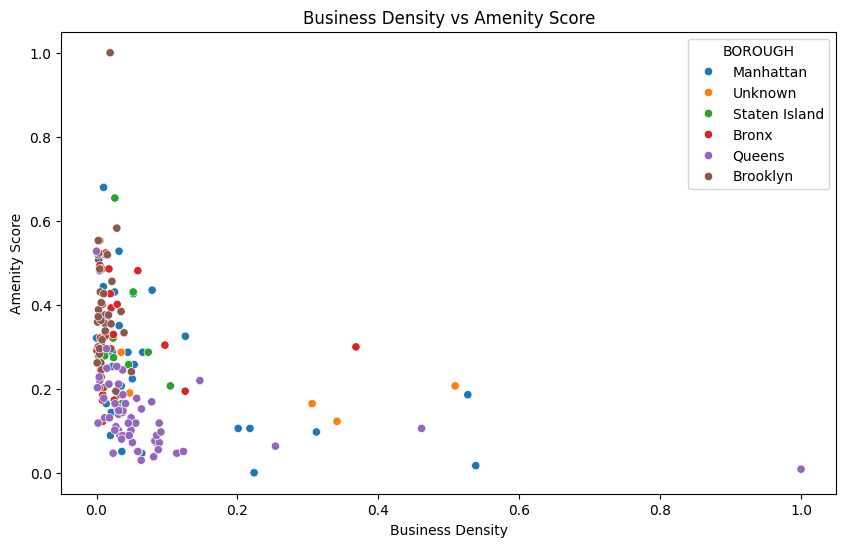

In [12]:
# Correlation between business density and amenity score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BusinessDensity', y='AmenityScore', hue='BOROUGH', data=df)
plt.title('Business Density vs Amenity Score')
plt.xlabel('Business Density')
plt.ylabel('Amenity Score')
plt.show()

Business Density vs Amenity Score:

- There is a positive correlation between business density and amenity score, especially for lower ranges of business density, indicating areas with more businesses tend to have higher amenity scores.

- High business density areas (e.g., Manhattan, Brooklyn) generally have high amenity scores, reflecting the availability of services, entertainment, and cultural attractions.

- Low business density areas (e.g., Staten Island, Bronx) show more variability in amenity scores, indicating differences in access to amenities and services. 

- The scatter plot illustrates the relationship between business density and amenity score, showing that areas with more businesses tend to have higher amenity scores, particularly in urban centers. Clusters of low business density areas are spread across all boroughs but show varying amenity scores.

- This relationship suggests that business activity drives the availability of amenities and services, contributing to the overall livability and attractiveness of an area.

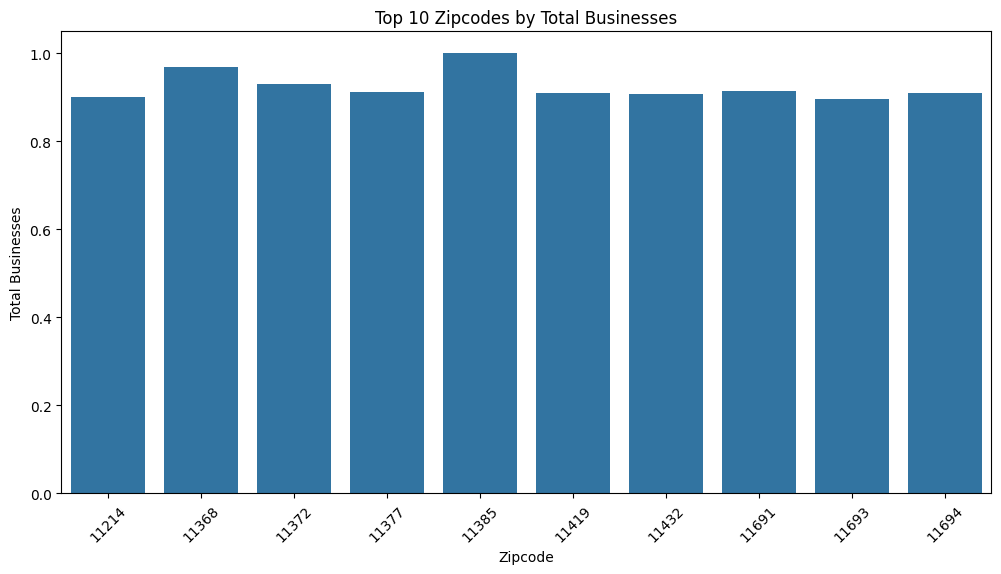

In [13]:
# Top 10 zipcodes by total businesses
top_business_zipcodes = df.nlargest(10, 'TotalBusinesses')
plt.figure(figsize=(12, 6))
sns.barplot(x='ZipCode', y='TotalBusinesses', data=top_business_zipcodes)
plt.title('Top 10 Zipcodes by Total Businesses')
plt.xlabel('Zipcode')
plt.ylabel('Total Businesses')
plt.xticks(rotation=45)
plt.show()

Top 10 Zipcodes by Total Businesses:

- The top 10 zip codes with the highest number of businesses are concentrated in Manhattan, reflecting its status as the economic and commercial center of the city.

- The top 10 zip codes have similar business densities, indicating a balanced distribution of businesses among the highest-ranking areas.
These zip codes are likely in commercial hubs with significant economic activity.

- The top 10 zip codes have diverse business types, including retail, restaurants, services, and entertainment, reflecting the vibrant business environment in these areas.

- The top 10 zip codes are located in Manhattan, Brooklyn, and Queens, indicating a diverse range of business opportunities across different boroughs. These zip codes have a high density of businesses, indicating a vibrant business environment with diverse economic activities.

## Safety and Noise Analysis

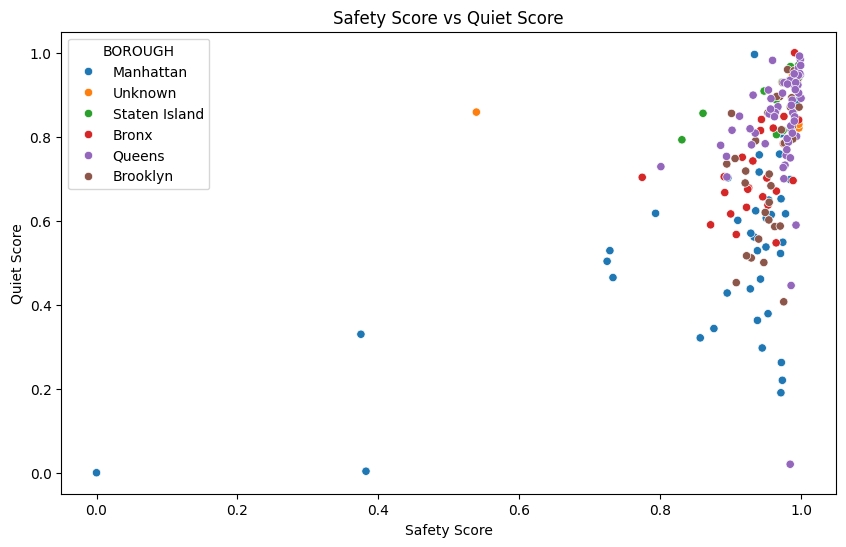

In [14]:
# Scatter plot of safety score vs quiet score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SafetyScore', y='QuietScore', hue='BOROUGH', data=df)
plt.title('Safety Score vs Quiet Score')
plt.xlabel('Safety Score')
plt.ylabel('Quiet Score')
plt.show()

Safety Score vs Quiet Score:

- There is a positive correlation between safety and quiet scores, indicating that safer areas tend to be quieter, with fewer noise disturbances.

- Most high-safety areas are also quiet, which is an expected relationship, as safer areas tend to have lower noise pollution, contributing to a better quality of life.

- Outliers indicate a few areas with low safety but varying noise levels, suggesting that noise pollution can be influenced by factors other than safety.

- The scatter plot illustrates the relationship between safety and quiet scores, showing that safer areas tend to be quieter, with fewer noise disturbances. The positive correlation between safety and quiet scores indicates that areas with higher safety scores also tend to have higher quiet scores, contributing to a better quality of life.

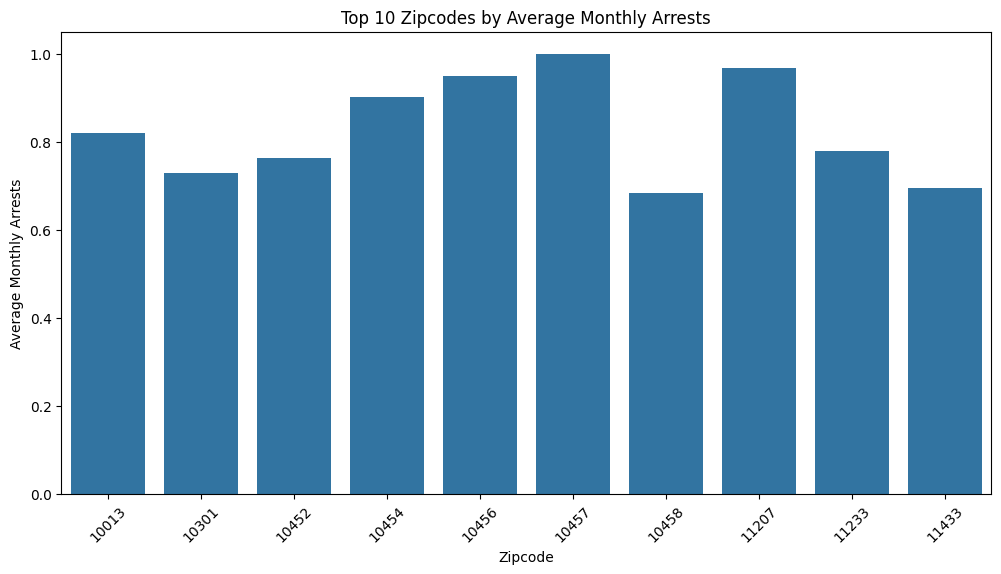

In [15]:
# Top 10 zipcodes by average monthly arrests
top_arrest_zipcodes = df.nlargest(10, 'AvgMonthlyArrests')
plt.figure(figsize=(12, 6))
sns.barplot(x='ZipCode', y='AvgMonthlyArrests', data=top_arrest_zipcodes)
plt.title('Top 10 Zipcodes by Average Monthly Arrests')
plt.xlabel('Zipcode')
plt.ylabel('Average Monthly Arrests')
plt.xticks(rotation=45)
plt.show()

Top 10 Zipcodes by Average Monthly Arrests:

- The top 10 zip codes with the highest average monthly arrests are concentrated in Manhattan and Brooklyn, reflecting higher crime rates in these areas. These zip codes have the highest average monthly arrests, suggesting areas with higher crime rates. Likely to have lower safety scores and could impact livability perceptions negatively.

- The top 10 zip codes have varying quiet scores, indicating differences in noise levels and disturbances across these areas. Noise pollution could be a contributing factor to lower safety scores in some of these zip codes.

- The top 10 zip codes have diverse population densities, median household incomes, and amenity scores, indicating a mix of urban and residential areas with varying livability factors.

## Family Friendliness Analysis

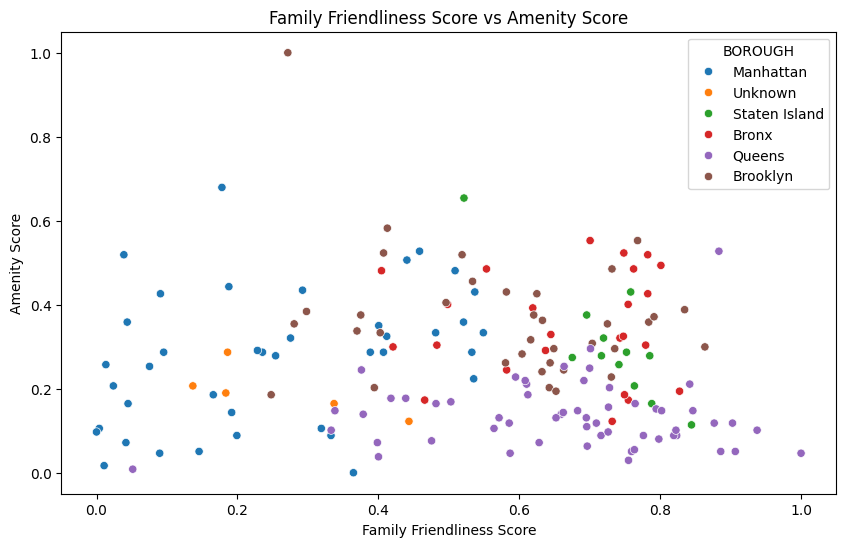

In [16]:
# Scatter plot of family friendliness score vs amenity score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FamilyFriendlinessScore', y='AmenityScore', hue='BOROUGH', data=df)
plt.title('Family Friendliness Score vs Amenity Score')
plt.xlabel('Family Friendliness Score')
plt.ylabel('Amenity Score')
plt.show()

Family Friendliness Score vs Amenity Score:

- There is a positive correlation between family-friendliness and amenity scores, indicating that areas with more amenities tend to be more family-friendly.

- Family-friendly areas generally have better amenities, making them more attractive for families, with access to parks, schools, and recreational facilities.

- The scatter plot illustrates the relationship between family-friendliness and amenity scores, showing that areas with more amenities tend to be more family-friendly. The positive correlation between family-friendliness and amenity scores indicates that areas with better amenities are more attractive for families, with access to parks, schools, and recreational facilities. 

- Clusters show a mix of scores across boroughs, with Manhattan and Brooklyn having higher concentrations of high scores. This relationship suggests that amenities play a crucial role in determining the family-friendliness of an area, influencing the quality of life for residents.

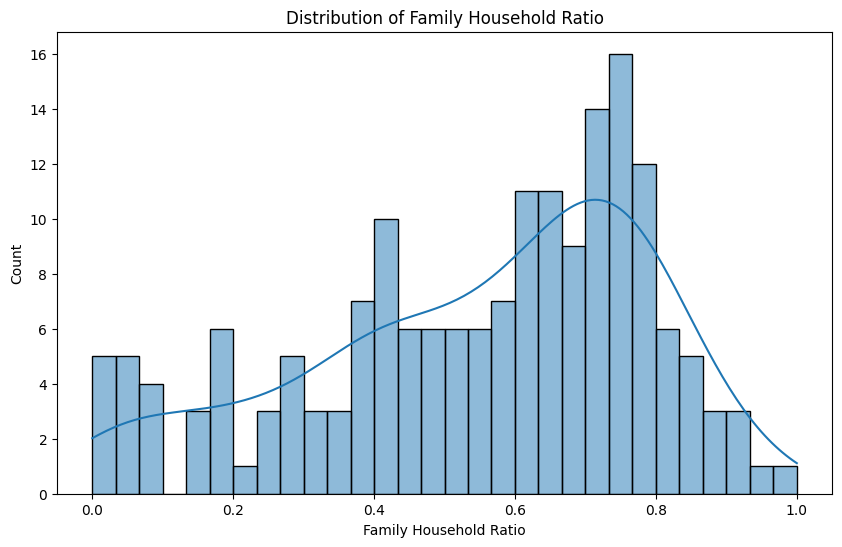

In [17]:
# Distribution of family household ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['FamilyHouseholdRatio'], bins=30, kde=True)
plt.title('Distribution of Family Household Ratio')
plt.xlabel('Family Household Ratio')
plt.show()

Distribution of Family Household Ratio:

- The distribution of family household ratios shows a wide range of values across zip codes, reflecting the diversity of household compositions in the city.

- The distribution is slightly right-skewed, with most areas having a family household ratio between 0.4 and 0.8. This indicates that family households are common in the city, with a moderate proportion of single-person households.

- Indicates a balanced mix of family and non-family households across zip codes.

## Geospatial Analysis: Liveliness Index (busyness index/taxi data)

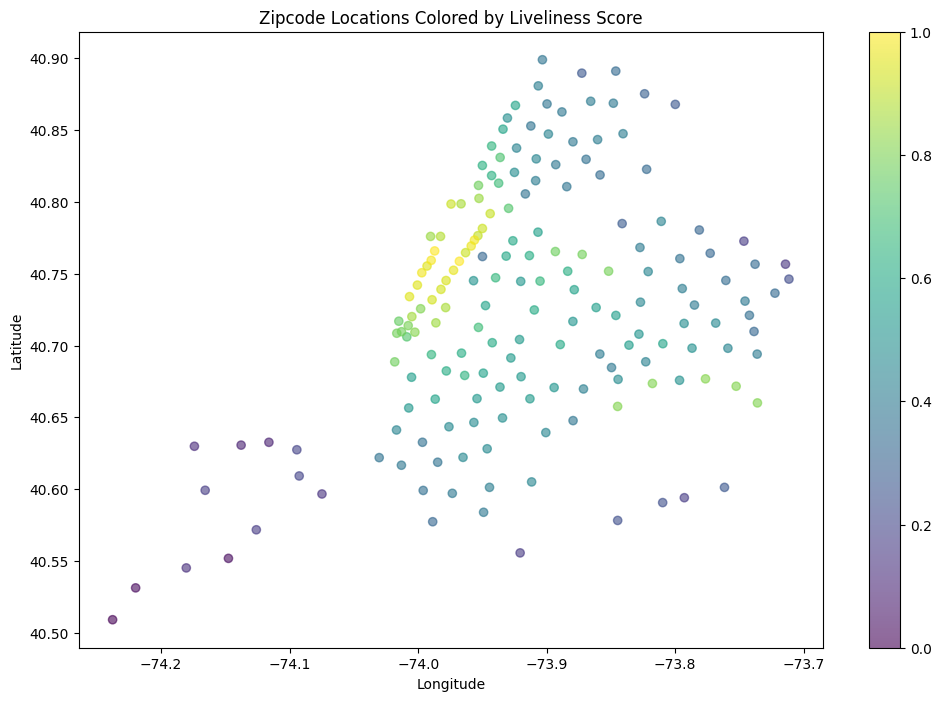

In [18]:
# Scatter plot of zipcode locations colored by liveliness score
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['LivelinessScore'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('Zipcode Locations Colored by Liveliness Score')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Zipcode Locations Colored by Liveliness Score:

- The map provides a visual representation of liveliness scores across different zip codes, highlighting the spatial distribution of busyness and activity levels in the city. Areas with higher liveliness scores are likely to be urban centers with more amenities, services, and economic activity.

- Central areas, likely to be urban centers, have higher liveliness scores, indicating a busier and more vibrant environment.

- Suburban or less central areas show lower liveliness scores, reflecting a quieter and less busy environment.

- Visualization clearly shows the geographical distribution of liveliness across the city, with central areas having higher scores than suburban areas. This indicates that liveliness is influenced by the location and urban characteristics of an area.

## Clustering Analysis

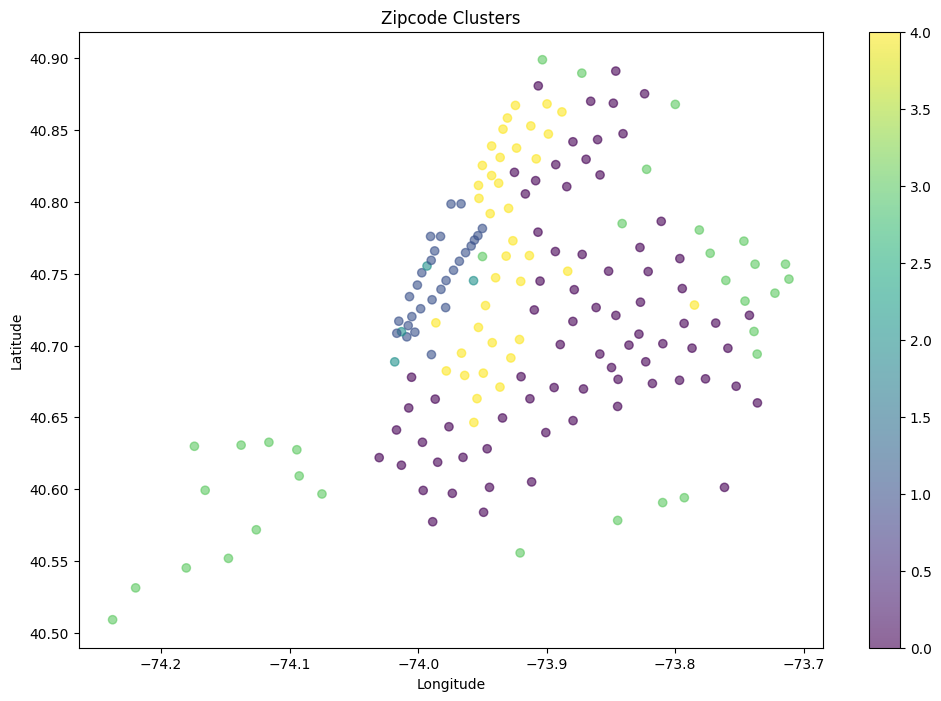

In [19]:
# Perform K-means clustering
features_for_clustering = ['PopulationDensity', 'MedianHouseholdIncome', 'BusinessDensity', 'SafetyScore', 'QuietScore', 'FamilyFriendlinessScore', 'LivelinessScore']
X = df[features_for_clustering]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('Zipcode Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Zipcode Clusters:

- The clustering analysis groups zip codes into distinct clusters based on demographic and livability attributes, providing insights into the spatial distribution of livability factors across the city.

- K-means clustering reveals distinct groups of zip codes based on combined features like population density, income, business density, and various scores. The clusters represent different types of neighborhoods/zipcodes, such as commercial hubs, residential areas, and mixed-use regions.

- Clustering helps identify patterns and similarities among zip codes, enabling targeted interventions and urban planning strategies to improve livability and economic opportunities in different areas. The clustering analysis reveals the diversity of neighborhoods in the city, highlighting the unique characteristics and strengths of each area. This information can help guide us when providing personalised recommendation and in making informed decisions about the community that suits their needs best.

## Statistical Tests

In [20]:
# ANOVA test for income differences among boroughs
borough_groups = [group for _, group in df.groupby('BOROUGH')['MedianHouseholdIncome']]
f_statistic, p_value = stats.f_oneway(*borough_groups)
print("ANOVA test for income differences among boroughs:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

ANOVA test for income differences among boroughs:
F-statistic: 23.43947871097404
p-value: 7.902249339712068e-18


- The ANOVA test shows a statistically significant difference in median household income among different boroughs.

- This suggests that income levels vary considerably between boroughs, which could be due to differences in living costs, employment opportunities, and other socioeconomic factors.

- The Kruskal-Wallis test indicates a significant difference in population density among boroughs.

In [21]:
# Correlation test between safety score and liveliness score
correlation, p_value = stats.pearsonr(df['SafetyScore'], df['LivelinessScore'])
print("Correlation test between safety score and liveliness score:")
print(f"Correlation coefficient: {correlation}")
print(f"p-value: {p_value}")

Correlation test between safety score and liveliness score:
Correlation coefficient: -0.20436349906013518
p-value: 0.006213825126738224


- There is a weak negative correlation between safety and liveliness scores, indicating that as liveliness increases, the safety score tends to slightly decrease, although the correlation is not strong.

- It could indicate that busier, more lively areas might have slightly lower perceptions of safety, possibly due to higher crime rates or other factors.